# Import all relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, SCORERS, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from imblearn.under_sampling import ClusterCentroids
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

CONTEXT: A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can
analyse all relevant customer data and develop focused customer retention programs.<br>
1. DATA DESCRIPTION: Each row represents a customer, each column contains customer’s attributes described on the column
Metadata. The data set includes information about:
- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device
protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly
charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents
<br>
2. PROJECT OBJECTIVE: Build a model that will help to identify the potential customers who have a higher probability to churn.
This help the company to understand the pinpoints and patterns of customer churn and will increase the focus on strategising
customer retention.

**1. Import and warehouse data:**
- Import all the given datasets. Explore shape and size.
- Merge all datasets onto one and explore final shape and size.

In [2]:
# importing all the datasets given
df1= pd.read_csv('TelcomCustomer-Churn_1.csv')
df2 = pd.read_csv('TelcomCustomer-Churn_2.csv')
df= pd.read_csv('TelcomCustomer-Churn.csv')

In [3]:
# Function to define the dataset 
def explain_df(d):
    print('The shape of the dataset:')
    print(d.shape, '\n')
    print('The size of the dataset:')
    print(d.size, '\n')
    print('the dimension of the dataset')
    print(d.ndim, '\n')
    print('Information about the dataset:')
    print(d.info(), '\n')
    print('5 point summary of the dataset:')
    print(d.describe(), '\n')
    print('Looking for null values:')
    print(d.isnull().any(), '\n')
    print('Checking for duplicates in the dataset:')
    print(df.duplicated().any(), '\n')

In [4]:
# function to return the rows if mutiple records found
def ret_mutiple(df):
    counts = df['customerID'].value_counts()
    df= df[df['customerID'].isin(counts.index[counts > 1])]
    return df

In [5]:
# Function to count the values present for each feature
def value_c(d):
    print('Checking the value counts:')
    for feature in d.columns: # Loop through all columns in the dataframe
        if d[feature].dtype == 'object':
            print(d[feature].value_counts(), '\n')

Let's see how each dataset looks

In [6]:
# First 5 values of df1
df1.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  
0  No phone service             DSL             No  
1                No             DSL            Yes  
2                No             DSL            Yes  
3  No phone service             DSL            Yes  
4                No     Fiber optic             No

In [7]:
# First 5 values of df1
df2.head()

customerID OnlineBackup DeviceProtection TechSupport StreamingTV  \
0  7590-VHVEG          Yes               No          No          No   
1  5575-GNVDE           No              Yes          No          No   
2  3668-QPYBK          Yes               No          No          No   
3  7795-CFOCW           No              Yes         Yes          No   
4  9237-HQITU           No               No          No          No   

  StreamingMovies        Contract PaperlessBilling              PaymentMethod  \
0              No  Month-to-month              Yes           Electronic check   
1              No        One year               No               Mailed check   
2              No  Month-to-month              Yes               Mailed check   
3              No        One year               No  Bank transfer (automatic)   
4              No  Month-to-month              Yes           Electronic check   

   MonthlyCharges TotalCharges Churn  
0           29.85        29.85    No  
1           56.95       1889.5    No  
2           53.85       108.15   Yes  
3           42.30      1840.75    No  
4           70.70       151.65   Yes

In [8]:
# First 5 values of df
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

After looking at the data it seems we already have merged data set with us

In [9]:
# Confirming is df is the merged data set available to us
print('Size of 1st dataset with repeated customerID(if any) : ',ret_mutiple(df1).size)
print('Size of 2nd dataset with repeated customerID(if any) : ',ret_mutiple(df2).size)
print('Size of already mergerd dataset with repeated customerID(if any) : ',ret_mutiple(df).size)

Size of 1st dataset with repeated customerID(if any) :  0
Size of 2nd dataset with repeated customerID(if any) :  0
Size of already mergerd dataset with repeated customerID(if any) :  0


There is no repeated column present in the dataset and each  record is a present in the merged dataset 

Let's explain each datasets now :

In [10]:
# Checking the details of df1
explain_df(df1)

The shape of the dataset:
(7043, 10) 

The size of the dataset:
70430 

the dimension of the dataset
2 

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customerID       7043 non-null   object
 1   gender           7043 non-null   object
 2   SeniorCitizen    7043 non-null   int64 
 3   Partner          7043 non-null   object
 4   Dependents       7043 non-null   object
 5   tenure           7043 non-null   int64 
 6   PhoneService     7043 non-null   object
 7   MultipleLines    7043 non-null   object
 8   InternetService  7043 non-null   object
 9   OnlineSecurity   7043 non-null   object
dtypes: int64(2), object(8)
memory usage: 550.4+ KB
None 

5 point summary of the dataset:
       SeniorCitizen       tenure
count    7043.000000  7043.000000
mean        0.162147    32.371149
std         0.368612    

In [11]:
# Checking the details of df2
explain_df(df2)

The shape of the dataset:
(7043, 12) 

The size of the dataset:
84516 

the dimension of the dataset
2 

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   OnlineBackup      7043 non-null   object 
 2   DeviceProtection  7043 non-null   object 
 3   TechSupport       7043 non-null   object 
 4   StreamingTV       7043 non-null   object 
 5   StreamingMovies   7043 non-null   object 
 6   Contract          7043 non-null   object 
 7   PaperlessBilling  7043 non-null   object 
 8   PaymentMethod     7043 non-null   object 
 9   MonthlyCharges    7043 non-null   float64
 10  TotalCharges      7043 non-null   object 
 11  Churn             7043 non-null   object 
dtypes: float64(1), object(11)
memory usage: 660.4+ KB
None 

5 point summary of the dataset:
     

In [12]:
# Checking the details of df
explain_df(df)

The shape of the dataset:
(7043, 21) 

The size of the dataset:
147903 

the dimension of the dataset
2 

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14 

*Inference*
- Most of the columns are columns with dtypes object with seniorcitizen, tenure and monthly charges being numerical
- Those columns may be identified as categorical columns
- seniorcitizen column appears to be a categorical column with binary data but is market as numerical
- The totalcharges column should be a numerical column too. we would need to check it.
- None of the data set contains null values and neither duplicates
- from the 5 point summary there doesnot appear to be much greater outliers in the dataset (we shall revisit, if total charges come out to be numerical)

Let's confirm if we have a merged dataset with us

In [13]:
# Checking if all values of customerID exists in the merged dataset present with us
print('comparing 1st ds with merged:\n', df['customerID'].isin(df1['customerID']).value_counts())
print('\n')
print('comparing 2nd ds with merged:\n', df['customerID'].isin(df1['customerID']).value_counts())

comparing 1st ds with merged:
 True    7043
Name: customerID, dtype: int64


comparing 2nd ds with merged:
 True    7043
Name: customerID, dtype: int64


All the values are of customers are present in the merged data set. Hence we shall continue our process with the merged dataset only

**2. Data cleansing:**
- Missing value treatment
- Convert categorical attributes to continuous using relevant functional knowledge
- Drop attribute/s if required using relevant functional knowledge
- Automate all the above steps

In [14]:
# Since SeniorCitizen column has binary value present, Hence subsituting it with relevant values
repl= { 'SeniorCitizen' : {0:'No', 1: 'Yes'}}
df= df.replace(repl)

In [15]:
df.head()

customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            No     Yes         No       1           No   
1  5575-GNVDE    Male            No      No         No      34          Yes   
2  3668-QPYBK    Male            No      No         No       2          Yes   
3  7795-CFOCW    Male            No      No         No      45           No   
4  9237-HQITU  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
# Checking if any row contains non numerical value for the column TotalCharges
df[~df.TotalCharges.str.contains(r'[0-9]')]

customerID  gender SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female            No     Yes        Yes       0   
753   3115-CZMZD    Male            No      No        Yes       0   
936   5709-LVOEQ  Female            No     Yes        Yes       0   
1082  4367-NUYAO    Male            No     Yes        Yes       0   
1340  1371-DWPAZ  Female            No     Yes        Yes       0   
3331  7644-OMVMY    Male            No     Yes        Yes       0   
3826  3213-VVOLG    Male            No     Yes        Yes       0   
4380  2520-SGTTA  Female            No     Yes        Yes       0   
5218  2923-ARZLG    Male            No     Yes        Yes       0   
6670  4075-WKNIU  Female            No     Yes        Yes       0   
6754  2775-SEFEE    Male            No      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)          52.55                  No  
753                Mailed check          20.25                  No  
936                Mailed check          80.85                  No  
1082               Mailed check          25.75                  No  
1340    Credit card (automatic)          56.05                  No  
3331               Mailed check          19.85                  No  
3826               Mailed check          25.35                  No  
4380               Mailed check          20.00                  No  
5218               Mailed check          19.70           

It can be observed from the above that the tenure for each of the record for which we donot have the Totalcharges values has null records. Let's confirm it.


In [18]:
# Checking if the missing value is specific to the Tenure
df[df.tenure==0]

customerID  gender SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female            No     Yes        Yes       0   
753   3115-CZMZD    Male            No      No        Yes       0   
936   5709-LVOEQ  Female            No     Yes        Yes       0   
1082  4367-NUYAO    Male            No     Yes        Yes       0   
1340  1371-DWPAZ  Female            No     Yes        Yes       0   
3331  7644-OMVMY    Male            No     Yes        Yes       0   
3826  3213-VVOLG    Male            No     Yes        Yes       0   
4380  2520-SGTTA  Female            No     Yes        Yes       0   
5218  2923-ARZLG    Male            No     Yes        Yes       0   
6670  4075-WKNIU  Female            No     Yes        Yes       0   
6754  2775-SEFEE    Male            No      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)          52.55                  No  
753                Mailed check          20.25                  No  
936                Mailed check          80.85                  No  
1082               Mailed check          25.75                  No  
1340    Credit card (automatic)          56.05                  No  
3331               Mailed check          19.85                  No  
3826               Mailed check          25.35                  No  
4380               Mailed check          20.00                  No  
5218               Mailed check          19.70           

In [19]:
# Replacing the String value of ' ' to null
df['TotalCharges']=df["TotalCharges"].replace(" ",np.nan)

In [20]:
# Confirming if the null values is now present in the dataset
df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [21]:
# Coverting the TotalCharges column to a numerical column
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [22]:
# Describing the dataset again so that Totalcharges can be included to be checked
df.describe()

tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7032.000000
mean     32.371149       64.761692   2283.300441
std      24.559481       30.090047   2266.771362
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.850000   3794.737500
max      72.000000      118.750000   8684.800000

In [23]:
# Imputing the values for nan values to have with the mean value of the total charge column
df['TotalCharges']=df["TotalCharges"].replace(np.nan,np.mean(df.TotalCharges))

In [24]:
# CustomerID column is unique for each record and doesnot add much value to the dataset
#  so, CustomerID column is a non important feature. Hence we can drop it
df.drop(['customerID'],axis=1,inplace=True)
df.shape

(7043, 20)

In [25]:
# Checking the 5 point summary after imputing the values for null Totalcharges
df.describe()

tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2283.300441
std      24.559481       30.090047   2265.000258
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    402.225000
50%      29.000000       70.350000   1400.550000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000

In [26]:
#Confirming if the dataset contains any null values
df.isnull().any().any()

False

In [27]:
# checking the value counts for each categorical columns
value_c(df)

Checking the value counts:
Male      3555
Female    3488
Name: gender, dtype: int64 

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64 

No     3641
Yes    3402
Name: Partner, dtype: int64 

No     4933
Yes    2110
Name: Dependents, dtype: int64 

Yes    6361
No      682
Name: PhoneService, dtype: int64 

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64 

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64 

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64 

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: in

- From the above, the feature Phone Service and Mutiple Lines seems to be related
- Mutiple lines can only be used by the customers who have phone service.
- Phone Service can be droped as a feature for model building as better details are present with Mutiplelines column
- A significant amount of customers churned in the previous month
- The target is not balanced and may require balancing

In [28]:
# Changing the columns classified as object to categorical columns
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer


In [29]:
# Checking the information about the dataset after the above change to category
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   category
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   int64   
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 16  PaymentMethod     7043 n

**3. Data analysis & visualisation:**
- Perform detailed statistical analysis on the data.
- Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

In [30]:
# Creating new dataframe to store the copy of the orginal dataset
df_corr= df.copy()

In [31]:
# Seggregating the columns based on its types
binary_cols = [] # categorical columns with binary values
multicat_cols=[] # categorical columns with multiple values
num_cols=[] #numerical cols
for f in df.drop('Churn', axis=1).columns: # removing the target variable
    if df[f].dtype == 'int64' or df[f].dtype == 'float64' :
        num_cols.append(f)
    else:
        if df[f].value_counts().shape[0] == 2:
            binary_cols.append(f)
        else:
            multicat_cols.append(f)

In [32]:
# Checking the no of columns based on its types, seggreated in the previous step
print('No of Numerical Columns',len(num_cols))
print('No of Binary Columns',len(binary_cols))
print('No of Multicategory Columns',len(multicat_cols))

No of Numerical Columns 3
No of Binary Columns 6
No of Multicategory Columns 10


In [33]:
# Checking the correlation between the numerical columns
df.corr()

tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.247900      0.824757
MonthlyCharges  0.247900        1.000000      0.650468
TotalCharges    0.824757        0.650468      1.000000

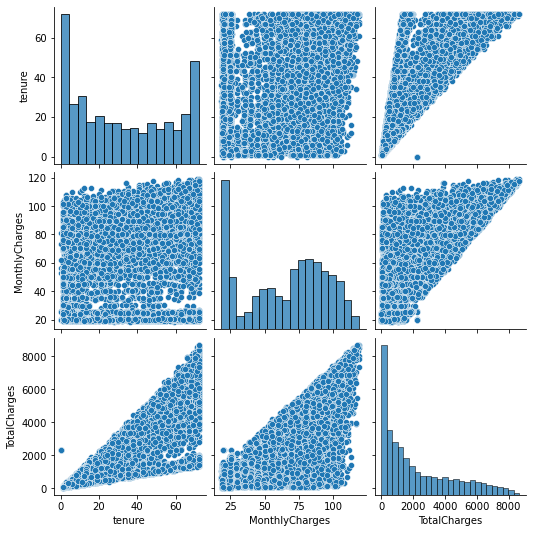

In [34]:
# plotting the graph to visualize the relation between the features
sns.pairplot(df)

- Tenure and total charges are highly correlated indicating that the charges borne by customers the customers increases<br>
as the year of association with the company increases.
- Monthly Charges and total charges are also correlated, which is obvious thing. The total charges increases as the monthly bill for a customer increases
- One of them can be dropped as bpth are going to add the similar significance to the model

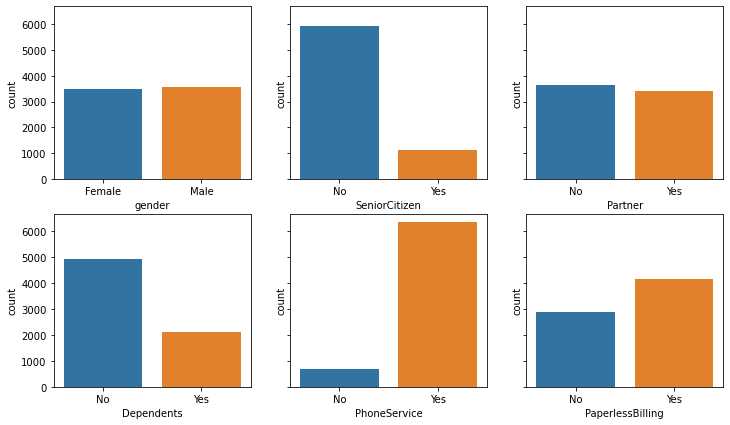

In [35]:
# Plotting the count plots for all the binary columns present for visualoization
fig, ax = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
i=0
j=0

for col in binary_cols:
    if j>=3:
        i+=1
        sns.countplot(col, data=df, ax=ax[i,0])
        j=1      
    else:
        sns.countplot(col, data=df, ax=ax[i,j])
        j+=1

- From the above plot, it can be said that the most of the customers are not Senior Citizen
- From the above plot, it can be said that the most of the customers have Phone Services
- For Senior citizen and phone service there is a huge imbalance

In [36]:
# Let's check the churn rate to understand how the features are effected wrt target
print('Churn Rate for Binary Columns:\n\n')
for col in binary_cols:
    print(df.groupby(col).Churn.apply(lambda x: (x == 'Yes').mean()),'\n\n')

Churn Rate for Binary Columns:


gender
Female    0.269209
Male      0.261603
Name: Churn, dtype: float64 


SeniorCitizen
No     0.236062
Yes    0.416813
Name: Churn, dtype: float64 


Partner
No     0.329580
Yes    0.196649
Name: Churn, dtype: float64 


Dependents
No     0.312791
Yes    0.154502
Name: Churn, dtype: float64 


PhoneService
No     0.249267
Yes    0.267096
Name: Churn, dtype: float64 


PaperlessBilling
No     0.163301
Yes    0.335651
Name: Churn, dtype: float64 




- Rate of churn for male and female is almost similar
- Rate of churn for customers with phone service has a 2% difference
- Gender column doesnot seem to have strong imapct on the prediction hence can be dropped
- Senior Citizen tends to churn more

Checking the distribution of the numerical columns wrt to target column

<AxesSubplot:xlabel='tenure', ylabel='Density'>

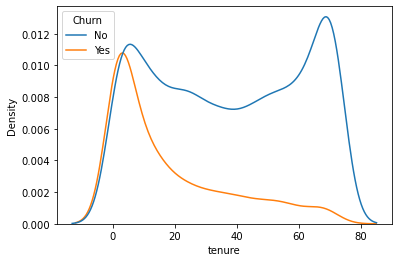

In [37]:
sns.kdeplot(x="tenure",hue="Churn", data=df)

-  The customer retention is crucial in the first 20 years of service
- Post that the chances of customer churing reduces significantly

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

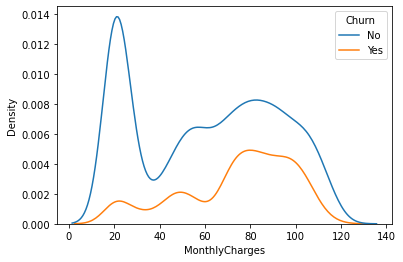

In [38]:
sns.kdeplot(data=df,x="MonthlyCharges",hue="Churn")

- Monthly charges are lower for customers who churn

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

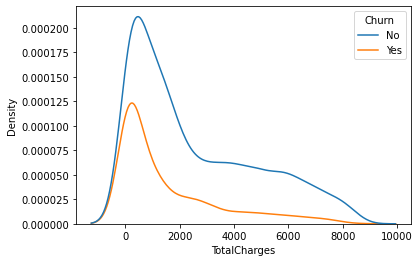

In [39]:
sns.kdeplot(data=df,x="TotalCharges",hue="Churn") 

- Total Charges are higher for customers who churn

<AxesSubplot:xlabel='gender', ylabel='TotalCharges'>

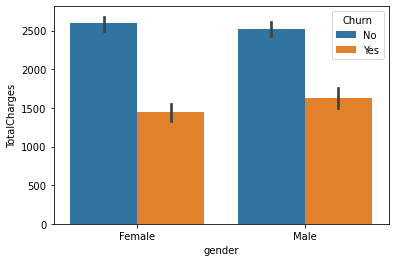

In [40]:
# Let's see if there is a difference in the in charges based on the gender
sns.barplot(y='TotalCharges', x='gender', hue='Churn', data=df)

Male and females tend to spend the same for both of the categories: churning and non-churning

<AxesSubplot:xlabel='Partner', ylabel='count'>

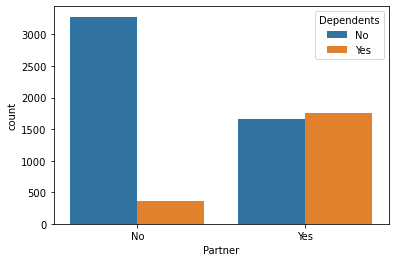

In [41]:
# Plotting the graph to explore about the customers who are partnered and have dependents
sns.countplot("Partner", data=df, hue = 'Dependents')

Text(0, 0.5, 'Number of Customers')

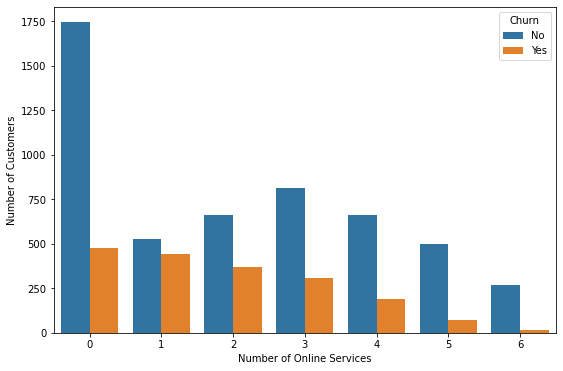

In [42]:
# Let's check the distribution of the customers availing the online services
df['Count_OnlineServices'] =(df[['OnlineSecurity','DeviceProtection','StreamingMovies','TechSupport',
                                 'StreamingTV', 'OnlineBackup']]=='Yes').sum(axis=1)
plt.figure(figsize=(9,6))
ax=sns.countplot(x='Count_OnlineServices',hue='Churn',data=df)
ax.set_xlabel('Number of Online Services')
ax.set_ylabel('Number of Customers')

- The attrition rate fpr customers who haven't opted for any Online Service is faily lesser
- with the increase in no of services availed by the user the attrition decreases

Text(0, 0.5, 'Average Monthly Charges')

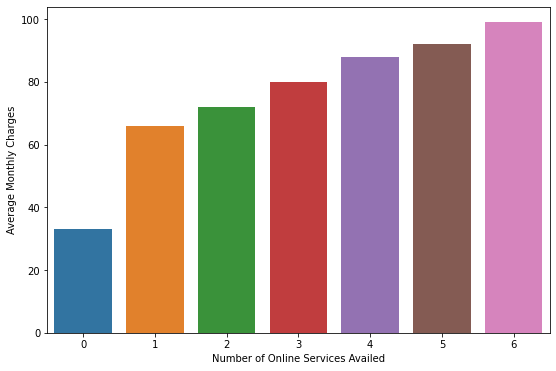

In [43]:
# Let's check the impact of charges on the the attrition of customers who opted for online services
agg = df.replace('Yes',1).replace('No', 0).groupby('Count_OnlineServices', as_index=False)[['MonthlyCharges']].mean()
agg[['MonthlyCharges']] = np.round(agg[['MonthlyCharges']], 0)

plt.figure(figsize=(9,6))
ax = sns.barplot(x='Count_OnlineServices',y='MonthlyCharges',data=agg)
ax.set_xlabel('Number of Online Services Availed')
ax.set_ylabel('Average Monthly Charges')

- The Avg Monthly charges increases with the increase in the no of services availed
- The charges between no service and 1 service availed is quite large confirming the drop in customers availing them

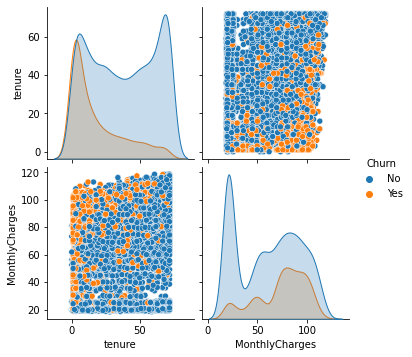

In [44]:
sns.pairplot(df[['tenure','MonthlyCharges','Churn']],hue='Churn');

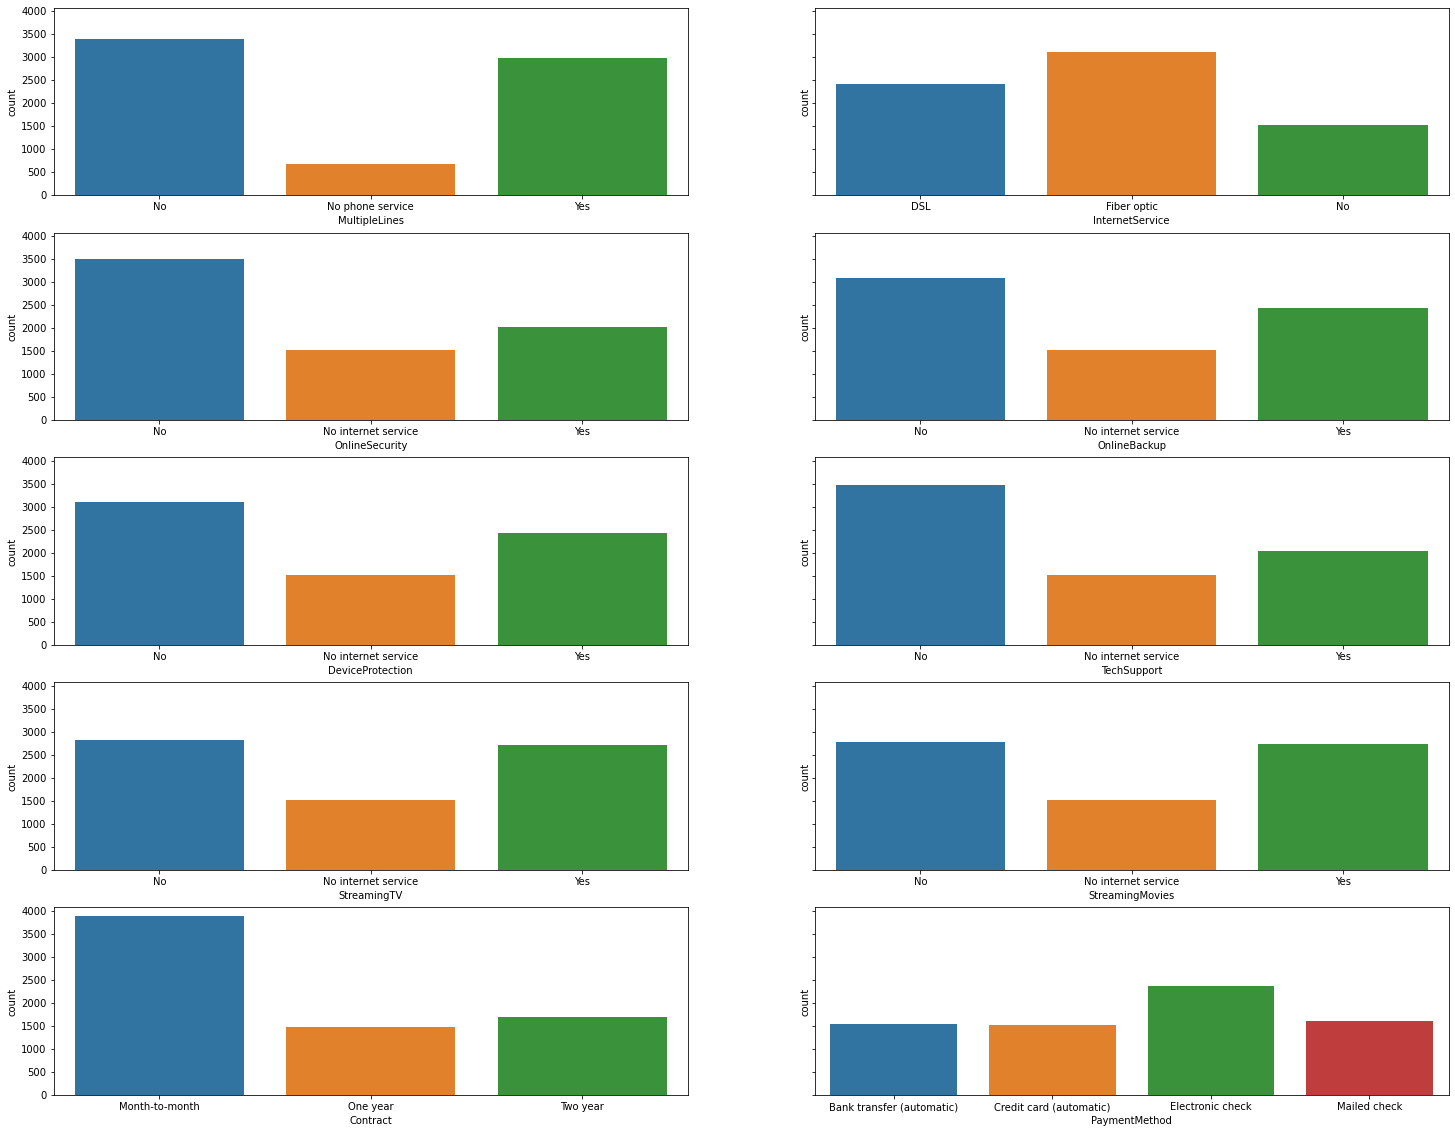

In [45]:
# Plotting the distribution of multicategory columns for understanding and visualization
fig, ax = plt.subplots(5, 2, figsize=(25, 20), sharey=True)
i=0
j=0

for col in multicat_cols:
    if j>=2:
        i+=1
        sns.countplot(col, data=df, ax=ax[i,0])
        j=1      
    else:
        sns.countplot(col, data=df, ax=ax[i,j])
        j+=1

- Significant amount of customers doesnot seem to be using the tech support fascilities.
- Significant amount of data is present for each multicategory featues.
- Most of the customers opt for Month-to-month subscription
- Customers prefer to pay via Electronic Check
- All the features seems to be useful for the model. But let's check further before any conclusiom

In [46]:
# Let's check the correlation between Total Charges incurred by the customer and the tenure for which they
# have been associated with the company
px.scatter(data_frame=df,x="TotalCharges",y="tenure",color="Churn")

- There seem to be a strong correlation between tenure and total charges

Now let's check for any outliers present and see the impact it might have to the company

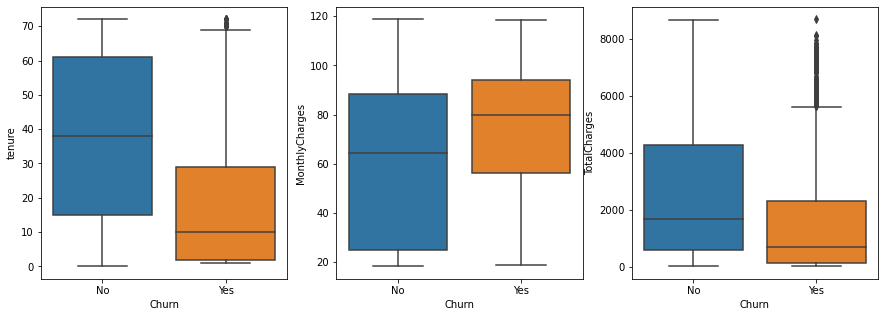

In [47]:
fig, ax =plt.subplots(1,3, figsize=(15, 5))
for i in range(len(num_cols)):
    sns.boxplot( data=df,x='Churn', y=num_cols[i], ax=ax[i])

- A large number of visible outliers are seen for customers who churn even after paying high 'TotalCharges'.
- Customers associated for a longer time also tend to churn 
- So the comapny might focus on retaining them.

In [48]:
# Let's try to find out the outliers in for those churned
lq=df[df.Churn=='Yes'].TotalCharges.quantile(.25) 
uq=df[df.Churn=='Yes'].TotalCharges.quantile(.75)
iqr=uq-lq
outlier = uq+(1.5 * iqr)

outlier_df = df[ (df.Churn=='Yes') & (df.TotalCharges > outlier) ]
tot_outlier = len(outlier_df.index)
outlier_avg = outlier_df.TotalCharges.mean()
outliers_sum = outlier_df.TotalCharges.sum()

print("No. of Customers who churned after paying high charges:", tot_outlier)
print("Average amount spent by such customer:",round( outlier_avg,2))
print("Loss in revenue for the company by such customers:", round(outliers_sum,2))
print("This is about",round((outlier_df.TotalCharges.sum()/df.TotalCharges.sum())*100,2),"% of total turnover that month")

No. of Customers who churned after paying high charges: 109
Average amount spent by such customer: 6670.28
Loss in revenue for the company by such customers: 727060.65
This is about 4.52 % of total turnover that month


In [49]:
# Checking the Churn Rate for Multicategory columns 
print('Churn Rate for Multi Category Columns:\n\n')
for col in multicat_cols:
    print(df.groupby(col).Churn.apply(lambda x: (x == 'Yes').mean()),'\n\n')

Churn Rate for Multi Category Columns:


MultipleLines
No                  0.250442
No phone service    0.249267
Yes                 0.286099
Name: Churn, dtype: float64 


InternetService
DSL            0.189591
Fiber optic    0.418928
No             0.074050
Name: Churn, dtype: float64 


OnlineSecurity
No                     0.417667
No internet service    0.074050
Yes                    0.146112
Name: Churn, dtype: float64 


OnlineBackup
No                     0.399288
No internet service    0.074050
Yes                    0.215315
Name: Churn, dtype: float64 


DeviceProtection
No                     0.391276
No internet service    0.074050
Yes                    0.225021
Name: Churn, dtype: float64 


TechSupport
No                     0.416355
No internet service    0.074050
Yes                    0.151663
Name: Churn, dtype: float64 


StreamingTV
No                     0.335231
No internet service    0.074050
Yes                    0.300702
Name: Churn, dtype: float64 


Stre

- Churn rate for customers having Fiber Optics Internet Service is higher
- Most of the customers not utilizing the Services provided by the company after opting for Internet connectivity tends to churn more
- Customers for shorter duration tends to churn ( month-to-month contract)
- Those Paying via electronic checks are churing more. Also from the graph above we saw it was the most common mode of payment


<AxesSubplot:xlabel='InternetService', ylabel='MonthlyCharges'>

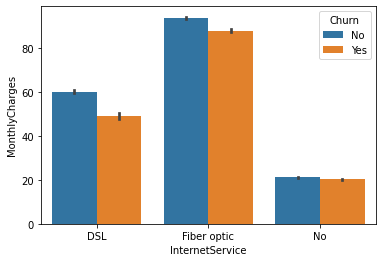

In [50]:
# Let;s see how the Internet service is effected by the Monthly charges
sns.barplot(y='MonthlyCharges', x='InternetService', hue='Churn', data=df)

The monthly charges for fiber optics is relatively higher indicating the reason of high churn rate for customers <br>
who opted for Fiber Optics internet Service.

In [51]:
# Checking the relation between monthly charges and tenure wrt to the customer attrition
df[['tenure', 'MonthlyCharges', 'Churn']].groupby('Churn').mean().reset_index()

Churn     tenure  MonthlyCharges
0    No  37.569965       61.265124
1   Yes  17.979133       74.441332

In [52]:
# Let's visualize how the contract and tenure related
px.bar(data_frame=df, x='Contract', y='tenure')

- More customer opt for two year contract
- This indicates that these customers may stay associated with the company for the longer time
- A significant amount of customers also opt on month to month service with lesser tenure indicating that the customers tend to churn.

Lets create a copy of the existing dataframe and encode all the categorical features present and check the correlation 

In [53]:
df_corr= df.copy()
lbe=LabelEncoder()
for col in df_corr.columns:
    if df_corr[col].dtype != 'int64' or df_corr[col].dtype != 'float64':
        df_corr[col]=lbe.fit_transform(df_corr[col])

In [54]:
# Let's confirm the correlation between tenure and contract
corr=df_corr.corr()
corr.loc['tenure', 'Contract']

0.6716065492281024

- Tenure and Contract are highly postively correlated from the graph as well as the output from the correlation matrix
- This confirms that the customer associated with the comapny for a long time tends to have longer contracts

<AxesSubplot:>

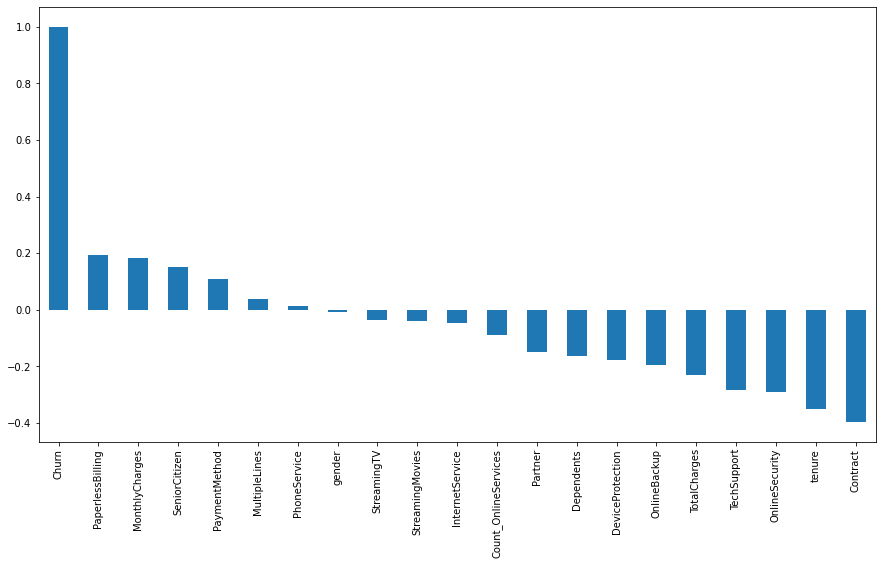

In [55]:
#Let's visualize the correaltion of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_corr.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

From all of the above we can come to the conclusion that the below mentioend features can be dropped

- Gender
- Phone Service
- Total Charges

In [56]:
df.drop(['gender','PhoneService','TotalCharges'], axis=1, inplace=True)

**4. Data pre-processing:**
- Segregate predictors vs target attributes
- Check for target balancing and fix it if found imbalanced.
- Perform train-test split.
- Check if the train and test data have similar statistical characteristics when compared with original data.

In [57]:
resultsDf= pd.DataFrame(columns=['Method', 'Accuracy'])

In [58]:
def Scale_Encode(X):
    cat_cols=[]
    num_cols=[]
    for f in X.columns: 
        if X[f].dtype == 'int64' or X[f].dtype == 'float64' :
            num_cols.append(f)
        else:
            cat_cols.append(f)
    std=StandardScaler()
    sc_num=std.fit_transform(X[num_cols])
    sc_num=pd.DataFrame(sc_num,columns=num_cols)
    for i in cat_cols:
        le = LabelEncoder()
        X[i] = le.fit_transform(X[i])
    X=X.drop(columns=num_cols,axis=1)
    X=X.merge(sc_num,left_index=True,right_index=True,how="left")
    return X


def classification(model, model_name, balancing):
    print('\n For ',model_name, '---->\n')
    if balancing=='No':
        model.fit(X_train, y_train)
        y_predict= model.predict(X_test)
        print('Training Accuracy: ', model.score(X_train, y_train))
        print('Testing Accuracy: ', model.score(X_test, y_test))
        print('ROC AUC Score: ', metrics.roc_auc_score(y_test,y_predict))
        print(confusion_m(y_predict, balancing))
        acc = metrics.accuracy_score(y_test, y_predict)
        global resultsDf
        tempResultsDf = pd.DataFrame({'Method':[model_name], 'Accuracy': [acc]})
        resultsDf = pd.concat([resultsDf, tempResultsDf])
    
    
    elif balancing=='SMOTE':
        model.fit(Xs_train, ys_train)
        ys_predict= model.predict(Xs_test)
        print('Training Accuracy: ', model.score(Xs_train, ys_train))
        print('Testing Accuracy: ', model.score(Xs_test, ys_test))
        print('ROC AUC Score: ', metrics.roc_auc_score(ys_test,ys_predict))
        print(confusion_m(ys_predict, balancing))
        acc = metrics.accuracy_score(ys_test, ys_predict)
        resultsDf.loc[resultsDf.Method == model_name, 'Accuracy(SMOTE)'] = acc
        
        
    else:
        model.fit(Xcc_train, ycc_train)
        ycc_predict= model.predict(Xcc_test)
        print('Training Accuracy: ', model.score(Xcc_train, ycc_train))
        print('Testing Accuracy: ', model.score(Xcc_test, ycc_test))
        print('ROC AUC Score: ', metrics.roc_auc_score(ycc_test,ycc_predict))
        print(confusion_m(ycc_predict, balancing))
        acc = metrics.accuracy_score(ycc_test, ycc_predict)
        resultsDf.loc[resultsDf.Method == model_name, 'Accuracy(CC)'] = acc


def confusion_m(p, balancing):
    if balancing=='No':
        print("\n Classification Report: \n", metrics.classification_report(y_test, p))
        print('\n')
        cm=metrics.confusion_matrix(y_test, p, labels=[0, 1])

        df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                          columns = [i for i in ["No","Yes"]])
        print('Confusion Matrics:\n',df_cm)
    elif balancing=='SMOTE':
        print("\n Classification Report: \n", metrics.classification_report(ys_test, p))
        print('\n')
        cm=metrics.confusion_matrix(ys_test, p, labels=[0, 1])

        df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                          columns = [i for i in ["No","Yes"]])
        print('Confusion Matrics:\n',df_cm)
    else:
        print("\n Classification Report: \n", metrics.classification_report(ycc_test, p))
        print('\n')
        cm=metrics.confusion_matrix(ycc_test, p, labels=[0, 1])

        df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                          columns = [i for i in ["No","Yes"]])
        print('Confusion Matrics:\n',df_cm)
    return df_cm

In [59]:
# Segregating the predictor and the target variables
X= Scale_Encode(df)
y=df["Churn"]
X=df.drop(["Churn"],axis=1)

In [60]:
# Train Test Split on the available dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1, stratify=y)

In [61]:
# Checking the target balancing
print(Counter(y_train))

Counter({0: 3622, 1: 1308})


 We saw that the target is imbalanced hence implementing target balance

In [62]:
# Train Test Split on balanced target using SMOTE
osmote=SMOTE()
Xs_train,ys_train=osmote.fit_resample(X_train,y_train)
Xs_test,ys_test=osmote.fit_resample(X_test,y_test)

print(Counter(ys_train))

Counter({0: 3622, 1: 3622})


In [63]:
# Train Test Split on balanced target using Cluster Centriods
cc=ClusterCentroids()
Xcc_train,ycc_train =cc.fit_resample(X_train,y_train)
Xcc_test,ycc_test   =cc.fit_resample(X_test,y_test)

print(Counter(ycc_train))

Counter({0: 1308, 1: 1308})


**5. Model training, testing and tuning:**
- Train and test all ensemble models taught in the learning module.<br>
 Suggestion: Use standard ensembles available. Also you can design your own ensemble technique using weak classifiers.
- Display the classification accuracies for train and test data.
- Apply all the possible tuning techniques to train the best model for the given data.<br>
Suggestion: Use all possible hyper parameter combinations to extract the best accuracies.
- Display and compare all the models designed with their train and test accuracies.
- Select the final best trained model along with your detailed comments for selecting this model.
- Pickle the selected model for future use.

In [64]:
# Listing the weak and strong classifiers to be used for testing
classifiers = [['DecisionTree',DecisionTreeClassifier()],
               ['RandomForest',RandomForestClassifier()],
               ['Bagging', BaggingClassifier()],
               ['AdaBoostClassifier', AdaBoostClassifier()],
               ['GradientBoostingClassifier ', GradientBoostingClassifier()],
               ['XGB', XGBClassifier()],
               ['CatBoost', CatBoostClassifier(logging_level='Silent')],
               ['Naive Bayes', GaussianNB()],
               ['KNeighbours', KNeighborsClassifier()],
               ['SVM', SVC()],
               ['LogisticRegression', LogisticRegression()]              
              ]

# Checking the accuracy of each model on the unbalanced data
for models in classifiers:
    classification(models[1], models[0], 'No')
    


 For  DecisionTree ---->

Training Accuracy:  0.9969574036511156
Testing Accuracy:  0.7236157122574538
ROC AUC Score:  0.6485237839278166

 Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1552
           1       0.48      0.49      0.48       561

    accuracy                           0.72      2113
   macro avg       0.65      0.65      0.65      2113
weighted avg       0.73      0.72      0.72      2113



Confusion Matrics:
        No  Yes
No   1255  297
Yes   287  274
       No  Yes
No   1255  297
Yes   287  274

 For  RandomForest ---->

Training Accuracy:  0.9969574036511156
Testing Accuracy:  0.7870326549929011
ROC AUC Score:  0.6934011889666831

 Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.63      0.49      0.55       561

    accuracy                           0.79      2113
   macro av

In [65]:
# Lets check the accuracy of each model stored in the resultsDf
resultsDf

Method  Accuracy
0                 DecisionTree  0.723616
0                 RandomForest  0.787033
0                      Bagging  0.768102
0           AdaBoostClassifier  0.800757
0  GradientBoostingClassifier   0.809749
0                          XGB  0.784193
0                     CatBoost  0.801704
0                  Naive Bayes  0.752485
0                  KNeighbours  0.774728
0                          SVM  0.792239
0           LogisticRegression  0.805017

In [66]:
# Checking the accuracy of each model where the target data is balanced using SMOTE
for models in classifiers:
    classification(models[1], models[0], 'SMOTE')


 For  DecisionTree ---->

Training Accuracy:  0.9977912755383765
Testing Accuracy:  0.7416237113402062
ROC AUC Score:  0.7416237113402062

 Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.79      0.75      1552
           1       0.77      0.69      0.73      1552

    accuracy                           0.74      3104
   macro avg       0.74      0.74      0.74      3104
weighted avg       0.74      0.74      0.74      3104



Confusion Matrics:
        No   Yes
No   1233   319
Yes   483  1069
       No   Yes
No   1233   319
Yes   483  1069

 For  RandomForest ---->

Training Accuracy:  0.9977912755383765
Testing Accuracy:  0.7931701030927835
ROC AUC Score:  0.7931701030927835

 Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.83      0.80      1552
           1       0.82      0.76      0.79      1552

    accuracy                           0.79      3104
   ma

In [67]:
# Lets check the accuracy of each model stored in the resultsDf
resultsDf

Method  Accuracy  Accuracy(SMOTE)
0                 DecisionTree  0.723616         0.741624
0                 RandomForest  0.787033         0.793170
0                      Bagging  0.768102         0.770296
0           AdaBoostClassifier  0.800757         0.804124
0  GradientBoostingClassifier   0.809749         0.808956
0                          XGB  0.784193         0.803157
0                     CatBoost  0.801704         0.819588
0                  Naive Bayes  0.752485         0.783183
0                  KNeighbours  0.774728         0.736469
0                          SVM  0.792239         0.757732
0           LogisticRegression  0.805017         0.789304

In [68]:
# Checking the accuracy of each model where the target data is balanced using Cluster Centroids
for models in classifiers:
    classification(models[1], models[0], 'Cluster Centriods')


 For  DecisionTree ---->

Training Accuracy:  1.0
Testing Accuracy:  0.7388591800356507
ROC AUC Score:  0.7388591800356507

 Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.74      0.74       561
           1       0.74      0.74      0.74       561

    accuracy                           0.74      1122
   macro avg       0.74      0.74      0.74      1122
weighted avg       0.74      0.74      0.74      1122



Confusion Matrics:
       No  Yes
No   416  145
Yes  148  413
      No  Yes
No   416  145
Yes  148  413

 For  RandomForest ---->

Training Accuracy:  1.0
Testing Accuracy:  0.8163992869875223
ROC AUC Score:  0.8163992869875223

 Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       561
           1       0.83      0.80      0.81       561

    accuracy                           0.82      1122
   macro avg       0.82      0.82      0.82    

In [69]:
# Lets check the accuracy of each model stored in the resultsDf
resultsDf

Method  Accuracy  Accuracy(SMOTE)  Accuracy(CC)
0                 DecisionTree  0.723616         0.741624      0.738859
0                 RandomForest  0.787033         0.793170      0.816399
0                      Bagging  0.768102         0.770296      0.784314
0           AdaBoostClassifier  0.800757         0.804124      0.811943
0  GradientBoostingClassifier   0.809749         0.808956      0.835116
0                          XGB  0.784193         0.803157      0.822638
0                     CatBoost  0.801704         0.819588      0.832442
0                  Naive Bayes  0.752485         0.783183      0.756684
0                  KNeighbours  0.774728         0.736469      0.749554
0                          SVM  0.792239         0.757732      0.740642
0           LogisticRegression  0.805017         0.789304      0.788770

- With the present dataset CatBoost gives the best accuracy.
- We can conclude that the target balanced dataset has a better accuracy
- The target balancing achieved using Cluster centroids has the best accuracy amongst the 3
- We shall proceed with the dataset using Cluster Centroids for our processes now

**Decision Tree**

In [70]:
#Using the Decision Tree as a model 
model= DecisionTreeClassifier()
model.fit(Xcc_train, ycc_train)
ycc_predict= model.predict(Xcc_test)
print('Training Accuracy: ', model.score(Xcc_train, ycc_train))
print('Testing Accuracy: ', model.score(Xcc_test, ycc_test))

Training Accuracy:  1.0
Testing Accuracy:  0.7308377896613191


It show that it is an over fit model where training score much better that the testing. Let's visualize the decision tree

Let's Visualize how the tree looks without any parameter tuning

Text(0.5, 1.0, 'Decision Tree Classifier')

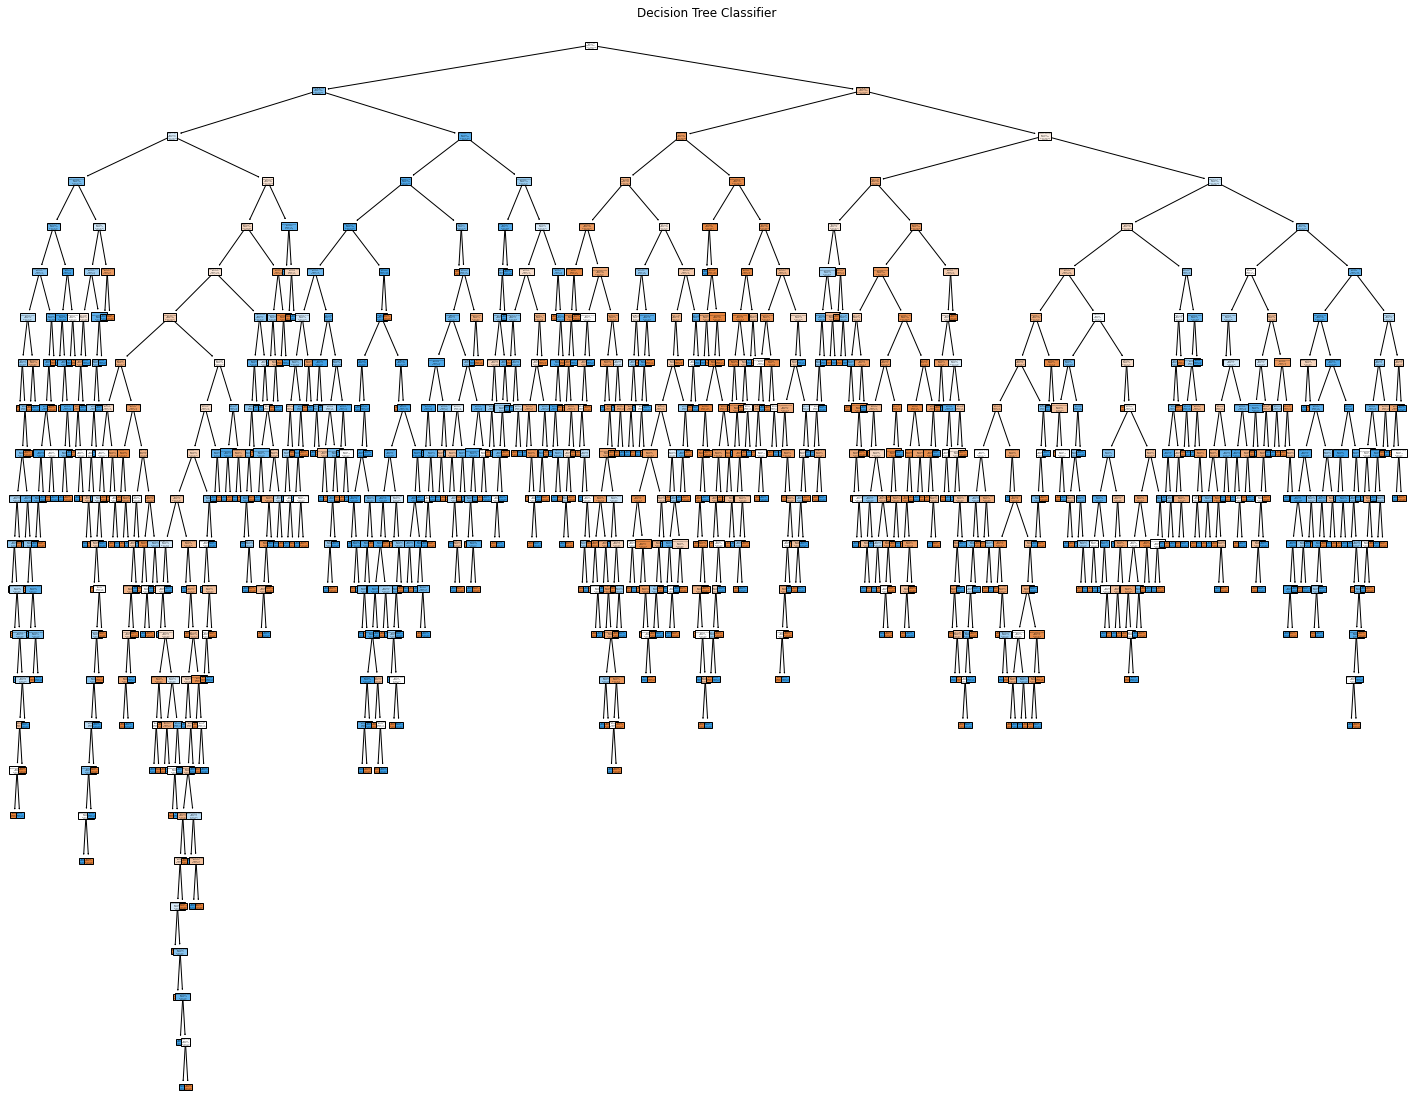

In [71]:
train_char_label = ['No', 'Yes']
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, feature_names=list(Xcc_train), class_names = list(train_char_label), filled=True)
plt.title('Decision Tree Classifier')

It can be clearly visualized how overfit the model is.<br>
<br>
Lets see after pruning the Dtree

Traing Accuracy : 0.7549694189602446
Testing Accuracy : 0.7629233511586453


Text(0.5, 1.0, 'Decision Tree(Pruned) Classifier')

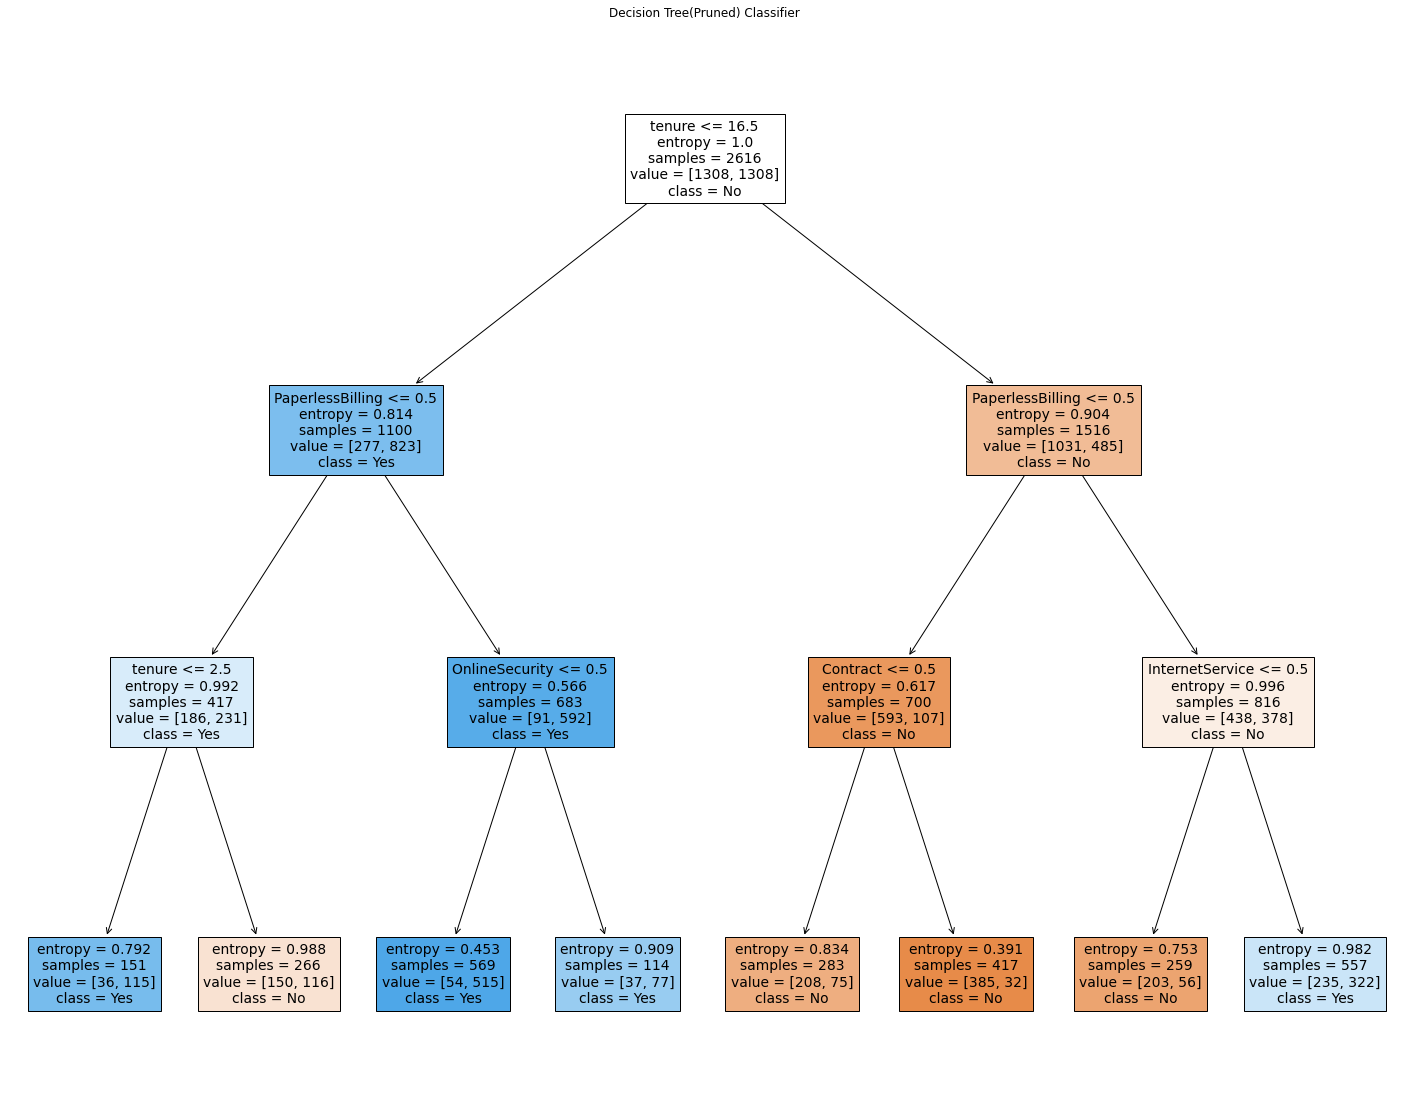

In [72]:
m2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=3, random_state=1)
m2.fit(Xcc_train,ycc_train)
print('Traing Accuracy :' , m2.score(Xcc_train, ycc_train))
print('Testing Accuracy :' , m2.score(Xcc_test, ycc_test))

train_char_label = ['No', 'Yes']
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(m2, feature_names=list(Xcc_train), class_names = list(train_char_label), filled=True)
plt.title('Decision Tree(Pruned) Classifier')

- The DTree has been pruned to a depth of 3
- Although the training accuracy dropped drastically, there is a significant improvement in the testing.
- The testing accuracy is now higher than the training accuracy
- The model no longer seems to be a overfit

Let's try to find out the best parameter to be implemented for the decision Tree. we shall be using 5 number of cross-validation you have to try for each selected set of hyperparameters

In [73]:
param = {'max_depth': range(2, 11), 'criterion': ['entropy', 'gini'],
          'random_state': range(1,30) } #Parameters for parameter tuning using the Grid Search

best_dt = GridSearchCV(DecisionTreeClassifier(),param, cv=5)                  
best_dt.fit(Xcc_train,ycc_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(2, 11),
                         'random_state': range(1, 30)})

In [74]:
print("Best parameter:", best_dt.best_params_)
print("Best cross validaton score", best_dt.best_score_)

Best parameter: {'criterion': 'entropy', 'max_depth': 7, 'random_state': 7}
Best cross validaton score 0.767966663260987


The score of the model increases with the parameter tuning.<br>

Training Score : 79.78
Testing Score : 77.36

 Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.83      0.79       561
           1       0.81      0.72      0.76       561

    accuracy                           0.77      1122
   macro avg       0.78      0.77      0.77      1122
weighted avg       0.78      0.77      0.77      1122



Confusion Matrics:
       No  Yes
No   466   95
Yes  159  402


<AxesSubplot:>

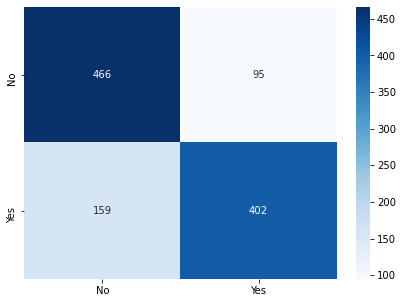

In [75]:
tuned_dt = DecisionTreeClassifier(criterion = 'entropy', max_depth=7, random_state=7)
tuned_dt.fit(Xcc_train,ycc_train)
y_predict= tuned_dt.predict(Xcc_test)
acc= tuned_dt.score(Xcc_test,ycc_test)
print(f'Training Score : {tuned_dt.score(Xcc_train,ycc_train) * 100:.2f}' )
print(f'Testing Score : {tuned_dt.score(Xcc_test,ycc_test) * 100:.2f}' )
cm=confusion_m(y_predict, 'CC')
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

In [76]:
# Dataframe to store the accuracy of all the tuned models 
tuned_acc= pd.DataFrame(columns=['Method', 'Accuracy'])

In [77]:
tuned_acc = pd.DataFrame({'Method':['Decision Tree'], 'Accuracy': [acc]})

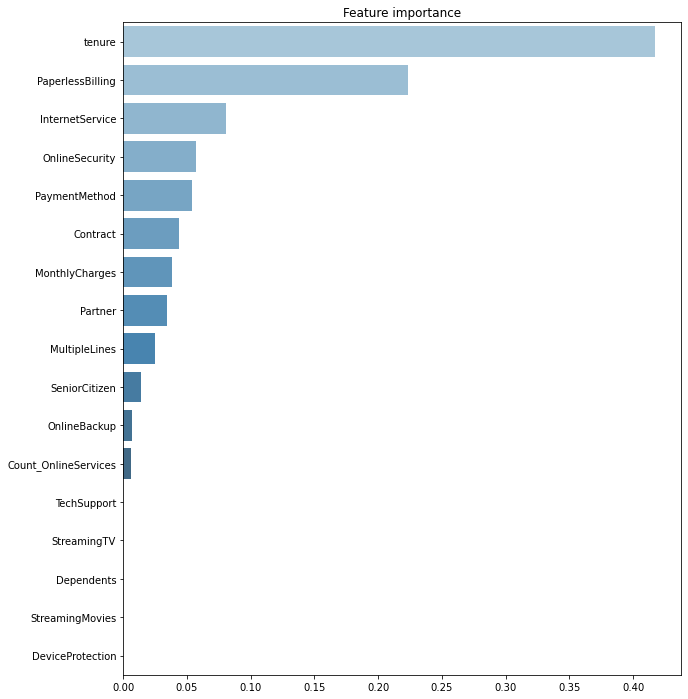

In [78]:
# lets check the feature importance 
imp = pd.Series(data=tuned_dt.feature_importances_, index=Xcc_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

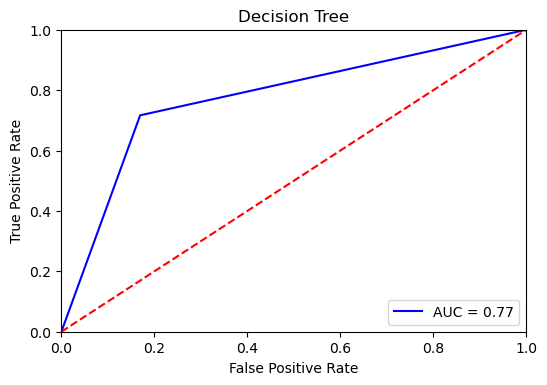

In [79]:
# Let's see the FP vs TP rate for the tuned model
probs = tuned_dt.predict_proba(Xcc_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(ycc_test, y_predict)
roc_auc = metrics.auc(fpr,tpr)
plt.figure(dpi=100)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title('Decision Tree')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Bagging**

In [80]:
# using bagging on the tuned decision tree
bgcl = BaggingClassifier(base_estimator=tuned_dt,n_estimators=20,max_features=9,random_state=1).fit(Xcc_train, ycc_train)
bgcl.fit(Xcc_train, ycc_train)
bgcl_pred=bgcl.predict(Xcc_test)

print('Training Score',  bgcl.score(Xcc_train,ycc_train))
print('Testing Score',  bgcl.score(Xcc_test,ycc_test))

Training Score 0.8287461773700305
Testing Score 0.8092691622103387



 Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.79      0.81       561
           1       0.80      0.83      0.81       561

    accuracy                           0.81      1122
   macro avg       0.81      0.81      0.81      1122
weighted avg       0.81      0.81      0.81      1122



Confusion Matrics:
       No  Yes
No   445  116
Yes   98  463


<AxesSubplot:>

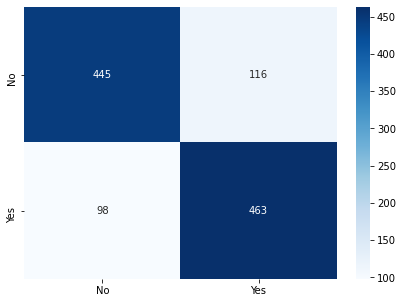

In [81]:
cm= confusion_m(bgcl_pred, 'CC')
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

Applying Bagging on the decision tree helps improve the accuracy


In [82]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'Accuracy': [bgcl.score(Xcc_test, ycc_test)]})
tuned_acc = pd.concat([tuned_acc, tempResultsDf])
tuned_acc

Method  Accuracy
0  Decision Tree  0.773619
0        Bagging  0.809269

**Random Forest**

In [83]:
rfcl = RandomForestClassifier(random_state=1)
rfcl = rfcl.fit(Xcc_train, ycc_train)
y_predict1= rfcl.predict(Xcc_test)

print('Training Accuracy: ', rfcl.score(Xcc_train, ycc_train))
print('Testing Accuracy: ', rfcl.score(Xcc_test, ycc_test))

Training Accuracy:  1.0
Testing Accuracy:  0.8190730837789661


In [84]:
# Checking the default paramters passed 
print(rfcl.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


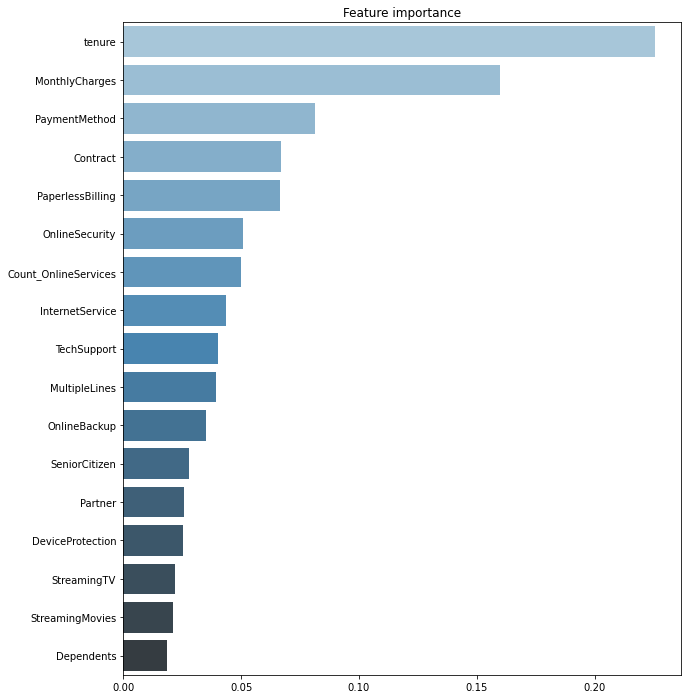

In [85]:
imp = pd.Series(data=rfcl.feature_importances_, index=Xcc_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

In [86]:
# Applying for Parameter tuning to find the best model
n_estimators = range(1,100)
max_features = ['auto', 'sqrt']
max_depth = range(1,100)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf = RandomForestClassifier(random_state = 42)
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=params,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

rf_random.fit(Xcc_train, ycc_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': range(1, 100),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': range(1, 100)},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=2)

In [87]:
print('The tuned parameters are: ', rf_random.best_params_)

The tuned parameters are:  {'n_estimators': 73, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 99, 'bootstrap': True}


In [88]:
rfc = RandomForestClassifier(n_estimators = 73, max_depth=18, min_samples_split=10, random_state = 1, bootstrap='False',
                            max_features='auto', min_samples_leaf= 2)
rfc.fit(Xcc_train, ycc_train)
yrfc_predict= rfc.predict(Xcc_test)
acc= rfc.score(Xcc_test, ycc_test)
print('Training Accuracy: ', rfc.score(Xcc_train, ycc_train))
print('Testing Accuracy: ', rfc.score(Xcc_test, ycc_test))

Training Accuracy:  0.8975535168195719
Testing Accuracy:  0.8163992869875223



 Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       561
           1       0.82      0.81      0.81       561

    accuracy                           0.82      1122
   macro avg       0.82      0.82      0.82      1122
weighted avg       0.82      0.82      0.82      1122



Confusion Matrics:
       No  Yes
No   463   98
Yes  108  453


<AxesSubplot:>

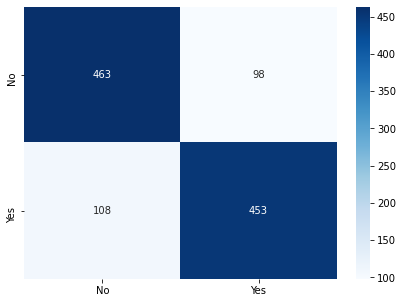

In [89]:
cm=confusion_m(yrfc_predict, 'CC')
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

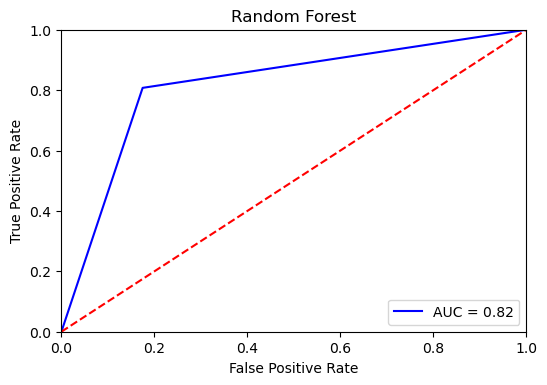

In [90]:
probs = rfc.predict_proba(Xcc_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(ycc_test, yrfc_predict)
roc_auc = metrics.auc(fpr,tpr)
plt.figure(dpi=100)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title('Random Forest')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [91]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'Accuracy': [acc]})
tuned_acc = pd.concat([tuned_acc, tempResultsDf])
tuned_acc

Method  Accuracy
0  Decision Tree  0.773619
0        Bagging  0.809269
0  Random Forest  0.816399

**XGBoost**

In [92]:
xgb = XGBClassifier(eval_metric='mlogloss')
xgb.fit(Xcc_train, ycc_train)
yxgb_predict= xgb.predict(Xcc_test)
print('Training Accuracy :', xgb.score(Xcc_train, ycc_train))
print('Testing Accuracy :', xgb.score(Xcc_test, ycc_test))

Training Accuracy : 0.9931192660550459
Testing Accuracy : 0.8226381461675579


In [93]:
param_grid = {'n_estimators': range(0,1000,25)}
# find the best parameter
grid_search = GridSearchCV(xgb, param_grid, scoring='recall')
grid_result = grid_search.fit(Xcc_train, ycc_train)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.8119358895615804 for {'n_estimators': 25}


In [94]:
xgb = XGBClassifier(n_estimators= 25, eval_metric='mlogloss')
xgb.fit(Xcc_train, ycc_train)
yxgb_predict= xgb.predict(Xcc_test)
print('Training Accuracy :', xgb.score(Xcc_train, ycc_train))
print('Testing Accuracy :', xgb.score(Xcc_test, ycc_test))


param_grid = {'max_depth': range(1,8,1)}

# find the best parameter
grid_search = GridSearchCV(xgb, param_grid, scoring='recall')
grid_result = grid_search.fit(Xcc_train, ycc_train)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')


Training Accuracy : 0.9216360856269113
Testing Accuracy : 0.8199643493761141
Best result: 0.821084495919979 for {'max_depth': 4}


In [95]:
xgb = XGBClassifier(n_estimators= 25, max_depth=4, eval_metric='mlogloss')
xgb.fit(Xcc_train, ycc_train)
yxgb_predict= xgb.predict(Xcc_test)
print('Training Accuracy :', xgb.score(Xcc_train, ycc_train))
print('Testing Accuracy :', xgb.score(Xcc_test, ycc_test))

param_grid = {'min_child_weight': np.arange(0.0001, 0.5, 0.001)}

# find the best parameter
grid_search = GridSearchCV(xgb, param_grid, scoring='recall')
grid_result = grid_search.fit(Xcc_train, ycc_train)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Training Accuracy : 0.8654434250764526
Testing Accuracy : 0.8288770053475936
Best result: 0.8241350062882045 for {'min_child_weight': 0.3671}


In [96]:
xgb_tuned = XGBClassifier(n_estimators= 25, max_depth=4, min_child_weight=0.3671, eval_metric='mlogloss')
xgb_tuned.fit(Xcc_train, ycc_train)
yxgbt_predict= xgb_tuned.predict(Xcc_test)
print('Training Accuracy :', xgb_tuned.score(Xcc_train, ycc_train))
print('Testing Accuracy :', xgb_tuned.score(Xcc_test, ycc_test))

Training Accuracy : 0.8512996941896025
Testing Accuracy : 0.8360071301247772



 Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       561
           1       0.85      0.82      0.83       561

    accuracy                           0.84      1122
   macro avg       0.84      0.84      0.84      1122
weighted avg       0.84      0.84      0.84      1122



Confusion Matrics:
       No  Yes
No   477   84
Yes  100  461


<AxesSubplot:>

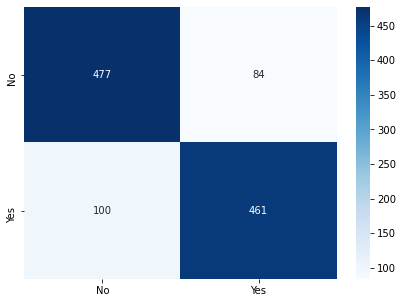

In [97]:
cm=confusion_m(yxgbt_predict, 'CC')
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

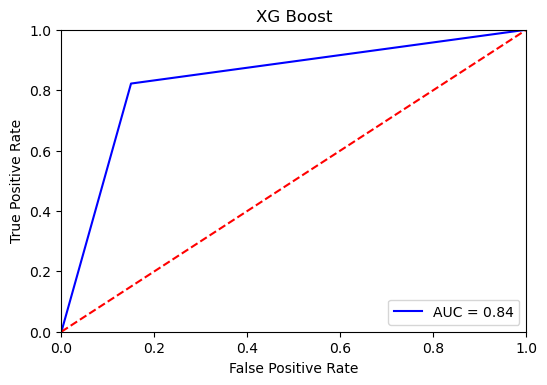

In [98]:
probs = xgb_tuned.predict_proba(Xcc_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(ycc_test, yxgbt_predict)
roc_auc = metrics.auc(fpr,tpr)
plt.figure(dpi=100)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title('XG Boost')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [99]:
tempResultsDf = pd.DataFrame({'Method':['XGBoost'], 'Accuracy': [xgb_tuned.score(Xcc_test, ycc_test)]})
tuned_acc = pd.concat([tuned_acc, tempResultsDf])
tuned_acc

Method  Accuracy
0  Decision Tree  0.773619
0        Bagging  0.809269
0  Random Forest  0.816399
0        XGBoost  0.836007

**CatBoost**

In [100]:
cb = CatBoostClassifier(logging_level='Silent')
cb.fit(Xcc_train, ycc_train)

print('Training Accuracy :' , cb.score(Xcc_train, ycc_train))
print('Testing Accuracy: ', cb.score(Xcc_test, ycc_test))

print(cb.get_all_params())

Training Accuracy : 0.9166666666666666
Testing Accuracy:  0.8324420677361853
{'nan_mode': 'Min', 'eval_metric': 'Logloss', 'iterations': 1000, 'sampling_frequency': 'PerTree', 'leaf_estimation_method': 'Newton', 'grow_policy': 'SymmetricTree', 'penalties_coefficient': 1, 'boosting_type': 'Plain', 'model_shrink_mode': 'Constant', 'feature_border_type': 'GreedyLogSum', 'bayesian_matrix_reg': 0.10000000149011612, 'l2_leaf_reg': 3, 'random_strength': 1, 'rsm': 1, 'boost_from_average': False, 'model_size_reg': 0.5, 'pool_metainfo_options': {'tags': {}}, 'subsample': 0.800000011920929, 'use_best_model': False, 'class_names': [0, 1], 'random_seed': 0, 'depth': 6, 'posterior_sampling': False, 'border_count': 254, 'classes_count': 0, 'auto_class_weights': 'None', 'sparse_features_conflict_fraction': 0, 'leaf_estimation_backtracking': 'AnyImprovement', 'best_model_min_trees': 1, 'model_shrink_rate': 0, 'min_data_in_leaf': 1, 'loss_function': 'Logloss', 'learning_rate': 0.015533000230789185, 'sco

In [101]:
grid = {'n_estimators': [50, 100, 200, 300],
       "learning_rate": np.linspace(0,0.2,2),
        "max_depth": [3,4,5]}

g_search= GridSearchCV(estimator = cb, param_grid = grid, scoring ='accuracy', cv = 5)
g_result = g_search.fit(Xcc_train, ycc_train)

print(f'Best result: {g_result.best_score_} for {g_result.best_params_}')

Best result: 0.8157473764103162 for {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 100}


In [102]:
cb_tuned = CatBoostClassifier(learning_rate= 0.2, max_depth= 4, n_estimators= 100, logging_level='Silent')
cb_tuned.fit(Xcc_train, ycc_train)
ycb_predict= cb_tuned.predict(Xcc_test)
print('Training Accuracy :', cb_tuned.score(Xcc_train, ycc_train))
print('Testing Accuracy :', cb_tuned.score(Xcc_test, ycc_test))

Training Accuracy : 0.8581804281345565
Testing Accuracy : 0.8342245989304813



 Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.83      0.83       561
           1       0.83      0.84      0.83       561

    accuracy                           0.83      1122
   macro avg       0.83      0.83      0.83      1122
weighted avg       0.83      0.83      0.83      1122



Confusion Matrics:
       No  Yes
No   466   95
Yes   91  470


<AxesSubplot:>

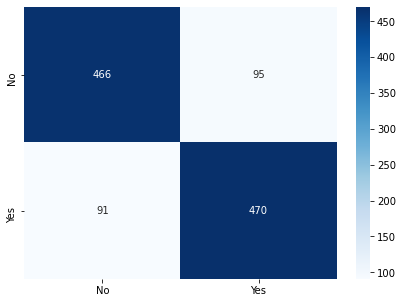

In [103]:
cm=confusion_m(ycb_predict, 'CC')
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

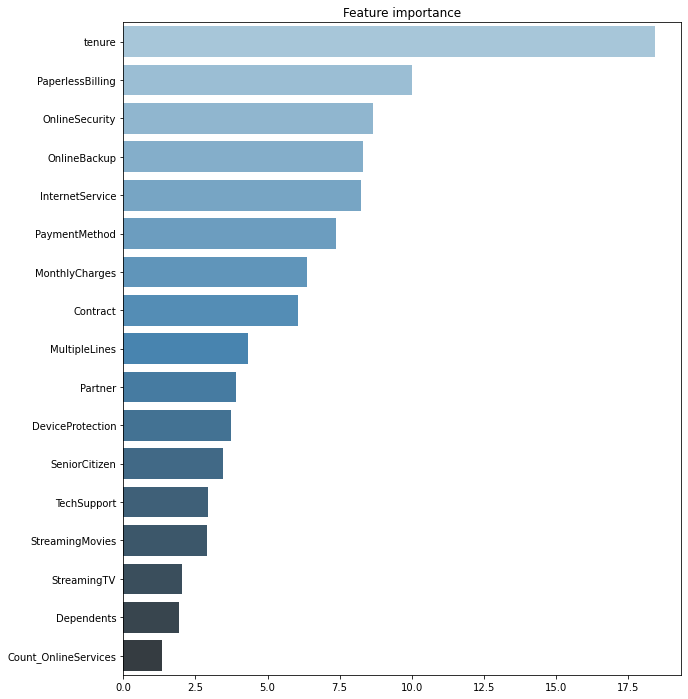

In [104]:
imp = pd.Series(data=cb_tuned.get_feature_importance(), index=Xcc_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

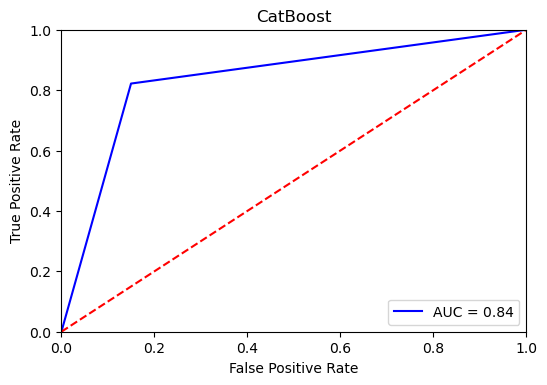

In [105]:
probs = cb_tuned.predict_proba(Xcc_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(ycc_test, yxgbt_predict)
roc_auc = metrics.auc(fpr,tpr)
plt.figure(dpi=100)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title('CatBoost')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [106]:
tempResultsDf = pd.DataFrame({'Method':['CatBoost'], 'Accuracy': [cb_tuned.score(Xcc_test, ycc_test)]})
tuned_acc = pd.concat([tuned_acc, tempResultsDf])
tuned_acc

Method  Accuracy
0  Decision Tree  0.773619
0        Bagging  0.809269
0  Random Forest  0.816399
0        XGBoost  0.836007
0       CatBoost  0.834225

**AdaBoost**

In [107]:
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(Xcc_train, ycc_train)
yab_predict= abcl.predict(Xcc_test)
print('Training Accuracy :' , abcl.score(Xcc_train, ycc_train))
print('Testing Accuracy: ', abcl.score(Xcc_test, ycc_test))

Training Accuracy : 0.7966360856269113
Testing Accuracy:  0.7932263814616756



 Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.79      0.79       561
           1       0.79      0.79      0.79       561

    accuracy                           0.79      1122
   macro avg       0.79      0.79      0.79      1122
weighted avg       0.79      0.79      0.79      1122



Confusion Matrics:
       No  Yes
No   445  116
Yes  116  445


<AxesSubplot:>

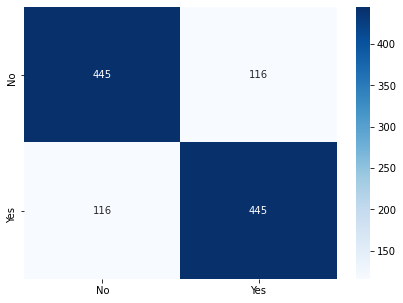

In [108]:
cm=confusion_m(yab_predict, 'CC')
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

In [109]:
tempResultsDf = pd.DataFrame({'Method':['AdaBoost'], 'Accuracy': [abcl.score(Xcc_test, ycc_test)]})
tuned_acc = pd.concat([tuned_acc, tempResultsDf])
tuned_acc

Method  Accuracy
0  Decision Tree  0.773619
0        Bagging  0.809269
0  Random Forest  0.816399
0        XGBoost  0.836007
0       CatBoost  0.834225
0       AdaBoost  0.793226

**Gradient Boosting**

In [110]:
gbc=GradientBoostingClassifier(learning_rate=0.1)
gbc.fit(Xcc_train, ycc_train)
ygbc_predict= gbc.predict(X_test)

print('Training Accuracy :' , gbc.score(Xcc_train, ycc_train))
print('Testing Accuracy: ', gbc.score(Xcc_test, ycc_test))

Training Accuracy : 0.8581804281345565
Testing Accuracy:  0.8351158645276292


In [111]:
print('Default Paramter\n',gbc.get_params())

Default Paramter
 {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [112]:
param = {'n_estimators': [50, 100, 200, 300],
       "learning_rate": np.linspace(0,0.2,2),
        "max_depth": [3,4,5]}

g_search= GridSearchCV(estimator = gbc, param_grid = param, scoring ='accuracy', cv = 5)
g_result = g_search.fit(Xcc_train, ycc_train)

print(f'Best result: {g_result.best_score_} for {g_result.best_params_}')

Best result: 0.8096346678732502 for {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}


In [113]:
gbc = GradientBoostingClassifier(learning_rate=0.2, n_estimators= 100, max_depth=3)
gbc.fit(Xcc_train, ycc_train)
ygbc_predict= gbc.predict(Xcc_test)
print('Training Accuracy :', gbc.score(Xcc_train, ycc_train))
print('Testing Accuracy :', gbc.score(Xcc_test, ycc_test))

param_grid = {'min_samples_split':range(200,1001,200),
              'min_samples_leaf':range(30,71,10)}

# find the best parameter
grid_search = GridSearchCV(gbc, param_grid, scoring='accuracy', cv=5)
grid_result = grid_search.fit(Xcc_train, ycc_train)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Training Accuracy : 0.9204892966360856
Testing Accuracy : 0.839572192513369
Best result: 0.8184235108665507 for {'min_samples_leaf': 60, 'min_samples_split': 600}


In [114]:
gbc_tuned = GradientBoostingClassifier(learning_rate=0.2, n_estimators= 100, max_depth=3, min_samples_leaf= 60,
                                     min_samples_split=600 , random_state=1)
gbc_tuned.fit(Xcc_train, ycc_train)
ygbct_predict= gbc_tuned.predict(Xcc_test)
print('Training Accuracy :', gbc_tuned.score(Xcc_train, ycc_train))
print('Testing Accuracy :', gbc_tuned.score(Xcc_test, ycc_test))

Training Accuracy : 0.8642966360856269
Testing Accuracy : 0.8431372549019608



 Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       561
           1       0.84      0.84      0.84       561

    accuracy                           0.84      1122
   macro avg       0.84      0.84      0.84      1122
weighted avg       0.84      0.84      0.84      1122



Confusion Matrics:
       No  Yes
No   472   89
Yes   87  474


<AxesSubplot:>

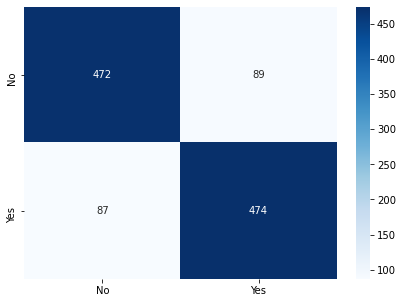

In [115]:
cm=confusion_m(ygbct_predict, 'CC')
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

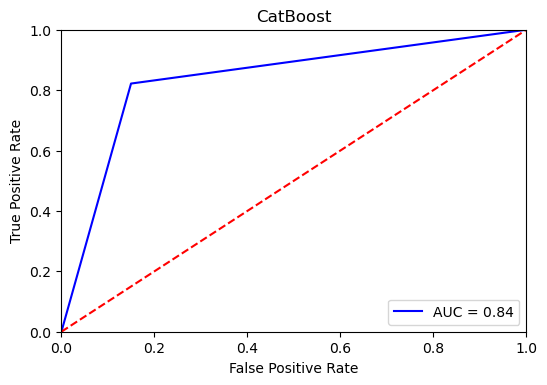

In [116]:
probs = gbc_tuned.predict_proba(Xcc_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(ycc_test, yxgbt_predict)
roc_auc = metrics.auc(fpr,tpr)
plt.figure(dpi=100)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title('CatBoost')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [117]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'Accuracy': [gbc_tuned.score(Xcc_test, ycc_test)]})
tuned_acc = pd.concat([tuned_acc, tempResultsDf])
tuned_acc

Method  Accuracy
0   Decision Tree  0.773619
0         Bagging  0.809269
0   Random Forest  0.816399
0         XGBoost  0.836007
0        CatBoost  0.834225
0        AdaBoost  0.793226
0  Gradient Boost  0.843137

- With Parameter tuning there is a significant stability in the model
- The Training and testing score are much more stable now
- Gradient boost Classifier gave the best model with the accuracy of 84 %


**Pickle Model**

The best model turned out to be GradientBoostingClassifier. Hence let's save it for further use.

In [118]:
import pickle 

best_model=GradientBoostingClassifier(learning_rate=0.2, n_estimators= 200, max_depth=3, min_samples_leaf= 30,
                                     min_samples_split=1000,random_state=1 )

best_model.fit(Xcc_train,ycc_train)


# Save the trained model as a pickle string. 
saved_model = pickle.dumps(best_model) 


# Save to file in the current working directory
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(best_model, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
# Calculate the accuracy score and predict target values
score = pickle_model.score(Xcc_test, ycc_test)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = pickle_model.predict(Xcc_test)

Test score: 84.31 %


**6. Conclusion and improvisation:**

- The data provided was diverse enough to make important conclusion throughout the exploratory process to build insights<br>
about the customer base
- The target given was imbalanced which was handled was several balancing methods available
- The dataset should have contained more data to have a balance in the target which could have enabled better understanding<br>
of data as well as improved the model.
- The addition of the salary component to the dataset could have help understand why the customer churned.
- The price of the internet service offered (espically for FiberOptics) by the company can be optimised to reduced the churn rate
- The company would need to investigate the plans offered to the customers as there was a sufficent gap between customers who did not opt for any online services.
- Our model could predict with 84 % accuracy which is good enough for such real life senerio predictions. More optimisation of the parameter could have resulted into the better model accuracy